<a href="https://colab.research.google.com/github/celeneheng/IS170_Binder/blob/3-K-Means-Clustering/HW4K_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# call the required libraries
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Electric_Vehicle_Population_Data.csv']))
print(df)

        VIN (1-10)     County           City State  Postal Code  Model Year  \
0       5YJ3E1EA8J  San Diego      Oceanside    CA      92051.0        2018   
1       3FA6P0PU7H   Sedgwick          Derby    KS      67037.0        2017   
2       1N4AZ0CP8D  Snohomish     Marysville    WA      98271.0        2013   
3       WBY8P8C58K     Kitsap      Bremerton    WA      98337.0        2019   
4       5YJ3E1EA7K  Snohomish        Edmonds    WA      98026.0        2019   
...            ...        ...            ...   ...          ...         ...   
118954  5YJ3E1EB7N  Snohomish        Edmonds    WA      98020.0        2022   
118955  1N4BZ0CP7H       King       Bellevue    WA      98004.0        2017   
118956  1N4AZ1CP8J       King        Redmond    WA      98052.0        2018   
118957  5YJXCAE41J       King        Seattle    WA      98109.0        2018   
118958  YV4BR0CLXM     Island  Camano Island    WA      98282.0        2021   

          Make    Model                   Electric 

In [ ]:
print(df.info)

<bound method DataFrame.info of         VIN (1-10)     County           City State  Postal Code  Model Year  \
0       5YJ3E1EA8J  San Diego      Oceanside    CA      92051.0        2018   
1       3FA6P0PU7H   Sedgwick          Derby    KS      67037.0        2017   
2       1N4AZ0CP8D  Snohomish     Marysville    WA      98271.0        2013   
3       WBY8P8C58K     Kitsap      Bremerton    WA      98337.0        2019   
4       5YJ3E1EA7K  Snohomish        Edmonds    WA      98026.0        2019   
...            ...        ...            ...   ...          ...         ...   
118954  5YJ3E1EB7N  Snohomish        Edmonds    WA      98020.0        2022   
118955  1N4BZ0CP7H       King       Bellevue    WA      98004.0        2017   
118956  1N4AZ1CP8J       King        Redmond    WA      98052.0        2018   
118957  5YJXCAE41J       King        Seattle    WA      98109.0        2018   
118958  YV4BR0CLXM     Island  Camano Island    WA      98282.0        2021   

          Make    M

In [ ]:
print(df.shape)

(118959, 17)


In [ ]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                133
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 294
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                     462
2020 Census Tract                                      2
dtype: int64

In [ ]:
df=df.dropna(subset=['City', 'Model Year'])
print(df.shape)

(118532, 17)


Text(0, 0.5, 'Model Year (years)')

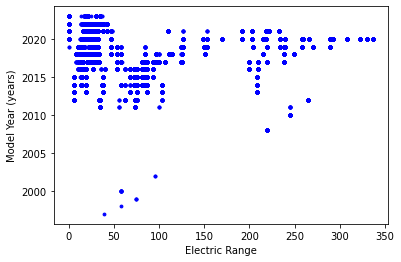

In [ ]:
#scatter plot
plt.scatter(df['Electric Range'],df['Model Year'], c='blue', s=8)
plt.xlabel("Electric Range")
plt.ylabel("Model Year (years)")

In [ ]:
k=4
X=np.array(list(zip(df['Model Year'], df['Electric Range'])))
model=KMeans(n_clusters=k)
kmeans=model.fit(X)
labels=model.predict(X)
centroids=model.cluster_centers_

print(labels)
print(centroids)


[2 2 1 ... 2 1 0]
[[2020.58530809    8.81869746]
 [2017.64720812  219.57409386]
 [2015.88102058   91.79047316]
 [2019.80004537  290.0289214 ]]


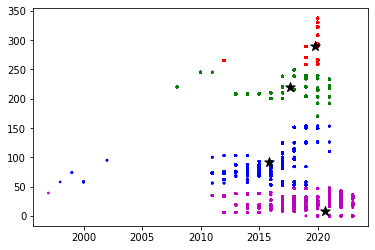

In [ ]:
#Plot the data and centroids on a scatter plot
#map the labels to colors

c=['m','g','b','r','y','c']
colors=[c[i] for i in labels]

plt.scatter(df['Model Year'], df['Electric Range'], c=colors, s=3)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')

In [ ]:
#Using the model that you have just trained, 
#you can use it to predict what cluster for any data pt

cluster=model.predict([[35,123]])[0]
print(c[cluster])


b


In [ ]:
#To determine the silhouette coefficient/score

from sklearn.metrics import silhouette_score

model=KMeans(n_clusters=4)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=2): {silhouette_score(X,label)}')


model=KMeans(n_clusters=3)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=3): {silhouette_score(X,label)}')


model=KMeans(n_clusters=4)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=4): {silhouette_score(X,label)}')


silhouette Score (n=2): 0.7424385590107588
silhouette Score (n=3): 0.75341607952851
silhouette Score (n=4): 0.7232809410811128


[[2020.58530809    8.81869746]
 [2017.64720812  219.57409386]
 [2015.88102058   91.79047316]
 [2019.80004537  290.0289214 ]]


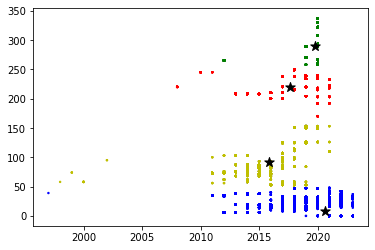

In [ ]:
k=4
X=np.array(list(zip(df['Model Year'],df['Electric Range'])))

kmeans=KMeans(n_clusters=k)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)
centroids=kmeans.cluster_centers_

#map the labels to colors
c=['b','r','y','g','c','m']
colors=[c[i] for i in labels]

plt.scatter(df['Model Year'],df['Electric Range'],c=colors,s=2)
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=100,c='black')

print(centroids)
